In [264]:
# création d'un dataset avec chaque année et chaque variable économique
import import_ipynb
import utils
import numpy as np

data_pop = utils.generate_df_from_files("./data_cleaned/population", "_population")
data_fertility = utils.generate_df_from_files("./data_cleaned/fertility", "_fertility")
data_child = utils.generate_df_from_files("./data_cleaned/child_mortality", "_child_mortality")
data_capita = utils.generate_df_from_files("./data_cleaned/gdp_capita", "_gdp_capita")
#data_life = utils.generate_df_from_files("./data_cleaned/life_expectancy_by_years", "_life_expectancy")
# 11 = dataset de 1992 12 = dataset de 1996 ...
annee = 18
data_pop = data_pop[annee:]
data_fertility = data_fertility[annee:]
data_child = data_child[annee:]
data_capita = data_capita[annee:]



X = np.concatenate((
    data_pop[0].iloc[:, 1:], 
    data_fertility[0].iloc[:,1:], 
    data_child[0].iloc[:,1:], 
    data_capita[0].iloc[:,1:] 
), axis=1)


In [265]:
# chargement des labels a partir d'ici il faudra répéter cette opération pour chaque événement olympique
# test pour 1992
import pandas as pd
df_delegations = pd.read_csv("./second_part_countries_cleaned_normalized.csv")


In [266]:
y = df_delegations.iloc[:, :-1]
y = y.iloc[0, :]

In [267]:
y

Albania       0.333333
Algeria       1.000000
Andorra       0.000000
Angola        0.500000
Argentina     0.000000
                ...   
Uzbekistan    0.000000
Venezuela     0.000000
Vietnam       0.000000
Zambia        0.750000
Zimbabwe      0.000000
Name: 0, Length: 163, dtype: float64

In [268]:
X[:].shape

(163, 4)

In [269]:
len(y)

163

In [270]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.2, verbose=1)


c:\Users\Julien\miniconda3\envs\PCD\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.2057 - mae: 0.2853 - val_loss: 0.1816 - val_mae: 0.2701
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1779 - mae: 0.2819 - val_loss: 0.1622 - val_mae: 0.2869
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1482 - mae: 0.2736 - val_loss: 0.1506 - val_mae: 0.3042
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1612 - mae: 0.3068 - val_loss: 0.1455 - val_mae: 0.3202
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1461 - mae: 0.3138 - val_loss: 0.1457 - val_mae: 0.3329
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1349 - mae: 0.3104 - val_loss: 0.1465 - val_mae: 0.3389
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1362 - mae: 0.3210 - val_loss: 0.1466 - val_mae: 0.3424
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.1387 - mae: 0.3204 - val_loss: 0.1471 - val_mae: 0.3455
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.1269 - mae:

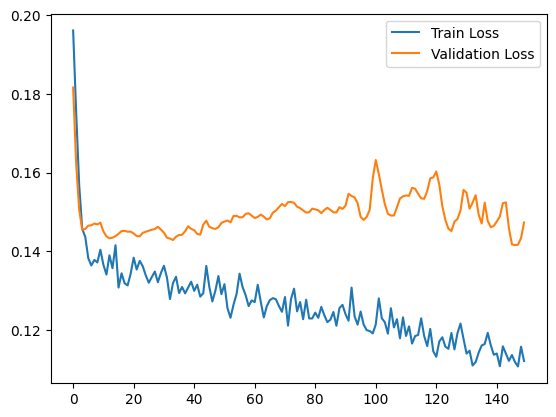

In [271]:
# plot de history pour voir l'évolution de la loss et de la mae
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(X_test)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [273]:
# affichage de chaque pays avec sa prédiction le nom de pays sont dans df_pop[0].iloc[0, 1] enregistrement dans un fichier csv

res = []
for i in range(len(predictions)):
    res.append({
        "country": data_pop[0].iloc[i, 0],
        "prediction": predictions[i][0],
        "real": y[i]
    })
    
pd.DataFrame(data=res).to_csv("predictions_mpl_1992.csv")

C:\Users\Julien\AppData\Local\Temp\ipykernel_6780\109845671.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "real": y[i]
